In [12]:
#importando paquetes
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import np_utils
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
#Configuración de parametros
#ancho y alto de las imagenes tratadas
width_shape = 224
height_shape = 224
#número de salidas u opciones
num_classes = 5
#número de epocas que se va a entrenar el sistema
epochs = 200
#número de inputs que entran en conjunto para entrenar al sistema
batch_size = 16

In [14]:
#Directorios de los datos de entrenamiento y validacion
train_data_dir = 'D:/Documentos/Inteligencia Artificial/Proyecto/dataset/train'  
validation_data_dir = 'D:/Documentos/Inteligencia Artificial/Proyecto/dataset/valid/'

In [15]:
#Generador de imagenes
train_datagen = ImageDataGenerator(
    #rota la imagen en +-20 grados
    rotation_range=20,
    #realiza un zoom a la imagen en un 20%
    zoom_range=0.2,
    #realiza un corrimiento de +-10% en horizontal de la imagen
    width_shift_range=0.1,
    #realiza un corrimiento de +-10% en vertical de la imagen
    height_shift_range=0.1,
    #invierte la imagen en horizontal
    horizontal_flip=True,
    #ivierte la imagen en vertical
    vertical_flip=True,
    #Las imágenes se convierten de RGB a BGR 
    #luego cada canal de color se centra en cero con respecto al conjunto de datos de ImageNet, sin escalar.
    preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    #direccion donde se encuentran las imagenes de entrenamiento
    train_data_dir,
    #ancho y alto que se desean las imagenes previamente establecido
    target_size=(width_shape, height_shape),
    #tamaño del grupo que sera ingresado a la vez
    batch_size=batch_size,
    #la etiqueta categorical se utiliza cuando se tienen
    #dos o más salidas
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

Found 188 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [78]:
#Entrenamiento con modelo VGG16
#número de entradas de entrenamiento y validación al modelo
nb_train_samples = 188
nb_validation_samples = 25

#declaración de las entradas, con la configuracion de ancho y alto de la imagen
#el número 3 indica que tiene tres canales, correspondientes a RGB
image_input = Input(shape=(width_shape, height_shape, 3))

#se cargan las dimensiones de las entradas
#se incluye la ultima capa de la red que crearemos a continuación
#se cargan al modelo los pesos pre entrenados con el dataset imagenet
model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

last_layer = model.get_layer('fc2').output

#declaración de la capa de salida donde se crearan n cantidad de neuronal como
#clases se deseen que pueda reconocer la red neuronal, en este caso sera de
#4 neuronal de salida con la funcion de activacion softmax, la cual devuelve un valor 1
#sobre la clase que tenga mayor porcentaje de acierto
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)

#se indica que la ultima capa sera la unica que sera entrenada
for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False
    
#se compila el modelo
#funcion de perdida categorical_crossentropy se utiliza cuando hay dos o más opciones de salida
#se utiliza el optimizador adadelta
#como metrica se tendra la precision
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

custom_vgg_model.summary()

model_history = custom_vgg_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

Epoch 35/200
11/11 [==============================] - 46s 4s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 36/200
11/11 [==============================] - 34s 3s/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 37/200
11/11 [==============================] - 36s 3s/step - loss: 0.0132 - accuracy: 0.9942 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 38/200
11/11 [==============================] - 36s 3s/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 6.3052e-04 - val_accuracy: 1.0000
Epoch 39/200
11/11 [==============================] - 36s 3s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 40/200
11/11 [==============================] - 52s 5s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 41/200
11/11 [==============================] - 59s 5s/step - loss: 6.6067e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.000

Epoch 146/200
11/11 [==============================] - 69s 6s/step - loss: 1.3285e-04 - accuracy: 1.0000 - val_loss: 6.5859e-04 - val_accuracy: 1.0000
Epoch 147/200
11/11 [==============================] - 85s 8s/step - loss: 2.6147e-04 - accuracy: 1.0000 - val_loss: 7.7997e-04 - val_accuracy: 1.0000
Epoch 148/200
11/11 [==============================] - 70s 6s/step - loss: 1.0655e-04 - accuracy: 1.0000 - val_loss: 3.3522e-05 - val_accuracy: 1.0000
Epoch 149/200
11/11 [==============================] - 79s 7s/step - loss: 8.7265e-05 - accuracy: 1.0000 - val_loss: 8.0310e-04 - val_accuracy: 1.0000
Epoch 150/200
11/11 [==============================] - 78s 7s/step - loss: 2.4471e-04 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 151/200
11/11 [==============================] - 75s 7s/step - loss: 1.1520e-04 - accuracy: 1.0000 - val_loss: 7.3784e-04 - val_accuracy: 1.0000
Epoch 152/200
11/11 [==============================] - 68s 6s/step - loss: 1.0402e-04 - accuracy: 

In [79]:
#Guardar Modelo
custom_vgg_model.save("model200_VGG16.h5")

In [80]:
#Ploteo de las graficas de perdida y aprendizaje generado por el modelo
def plotTraining(hist, epochs, typeData):
    
    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')
        

    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18) 
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)
 

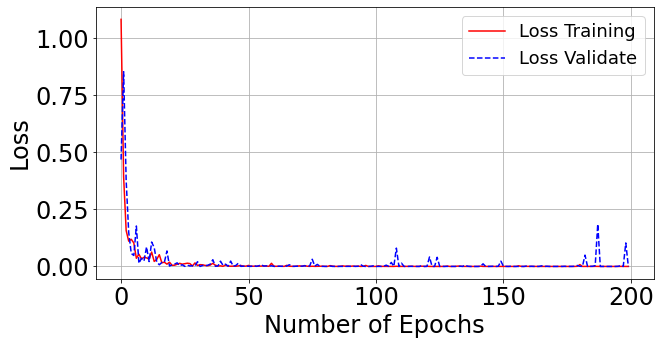

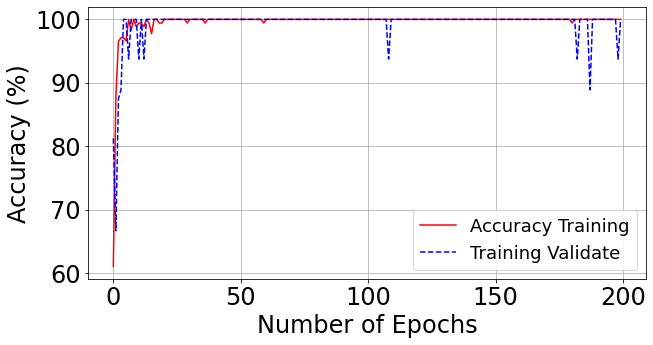

In [81]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")

Maduro pasado
[[0.00118281 0.94520456 0.00626563 0.03891361 0.0084334 ]]
1


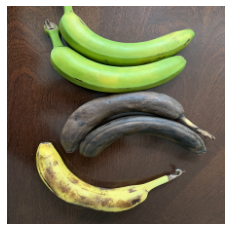

In [110]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['Maduro','Maduro pasado','Pasado','Tierno','Verde']


modelt= custom_vgg_model

imaget_path = "D:/Documentos/Inteligencia Artificial/Proyecto/pruebas/IMG_2905.JPG"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
print(preds)
print(np.argmax(preds))
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()